<h3 align="center">E-Commerce Analytics</h3> 
<h3 align="center">( The RFM Approach )</h3> 




### ABSTRACT : 
**<font color='blue'> _Analyze and segment the customers of an e-commerce company by using the RFM approach.    
This will enable the e-commerce company to optimize their retention and acquisition strategies._  </font>**



### Market Outlook: 
<font color='green'>E-commerce stores which became success stories were successful in targeting the desired customers.  
One of the techniques by which they were able to achieve this was customer segmentation i.e. by segmenting the existing customers based on frequency of purchases, monetary value etc. </font>

<font color='green'>E-commerce stores who designed market strategies based on mass marketing soon realized the need of customer segmentation as an alternative to save cost and efforts in the digital sphere. </font>

In a real-world segmentation scenario, there might be hundreds of variables which can be used but broadly they segment the customers by the following characteristics: 

- **Geographic -** <font color='green'>Segments based on country, state, and city.</font>

- **Demographic -** <font color='green'>Segments based on gender, age, income, education level, etc.</font>

- **Psychographic -** <font color='green'>Segments based on geography, lifestyle, age and religious beliefs, etc.</font> 

- **Behavior -** <font color='green'>Segments based on consumer personality traits, attitudes, interests, and lifestyles.</font>

### Overview of the problem :  
- **Data File Provided:** A single file is provided which contains data related to the ecommerce transactions.  
- <font color='green'>**Contents:**</font>  
            Date-time of sale,
            Customer shipping location, 
            Price of single unit from 2016 to 2017.

### Data and Problem Detail : 
- <font color='green'> Draw meaningful insights from 2 years of data & provide brief details based on the monetary value, frequency of buy, etc.</font>   

### Objective : 
- <font color='blue'> Build an unsupervised learning model which can enable your company   
to analyze their customers via RFM (Recency, Frequency and Monetary value) approach.</font>

### Steps to be followed: 
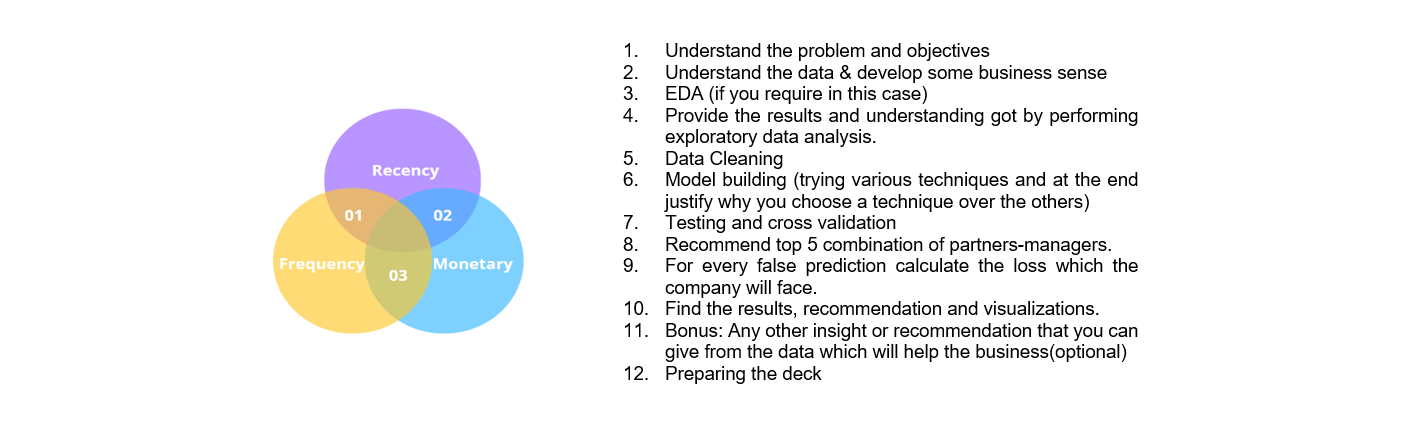

# The Project

### Import Libraries

In [92]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset and Show Part of It

In [93]:
dataset = pd.read_csv('E-com_Data.csv')
dataset.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoieNo           537979 non-null  float64
 3   Date of purchase   537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


### Data Cleaning & Pre-Processing

In [95]:
dataset.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        2900
Price                13529
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [96]:
print(dataset.isnull().sum()/len(dataset)*100)

CustomerID            25.304556
Item Code              0.579728
InvoieNo               0.579728
Date of purchase       0.579728
Quantity               0.579728
Time                   0.579728
price per Unit         0.579728
Price                  0.579728
Shipping Location      0.579728
Cancelled_status      98.457817
Reason of return      99.999446
Sold as set          100.000000
dtype: float64


In [97]:
dataset.duplicated().sum()

3145

In [98]:
dataset = dataset.rename(columns = {'InvoieNo':"InvoiceNo",
                                    "Date of purchase":"Date"})

In [99]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541116 entries, 0 to 541115
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         404189 non-null  float64
 1   Item Code          537979 non-null  object 
 2   InvoiceNo          537979 non-null  float64
 3   Date               537979 non-null  object 
 4   Quantity           537979 non-null  float64
 5   Time               537979 non-null  object 
 6   price per Unit     537979 non-null  float64
 7   Price              537979 non-null  float64
 8   Shipping Location  537979 non-null  object 
 9   Cancelled_status   8345 non-null    object 
 10  Reason of return   3 non-null       object 
 11  Sold as set        0 non-null       float64
dtypes: float64(6), object(6)
memory usage: 49.5+ MB


In [100]:
dataset.isnull().sum()

CustomerID           136927
Item Code              3137
InvoiceNo              3137
Date                   3137
Quantity               3137
Time                   3137
price per Unit         3137
Price                  3137
Shipping Location      3137
Cancelled_status     532771
Reason of return     541113
Sold as set          541116
dtype: int64

In [101]:
# Note : pls check with your stakeholder as well as your change management team
# pls drop it
dataset = dataset.drop_duplicates(ignore_index=True)

In [102]:
dataset.isnull().sum()

CustomerID           133790
Item Code                 1
InvoiceNo                 1
Date                      1
Quantity                  1
Time                      1
price per Unit            1
Price                     1
Shipping Location         1
Cancelled_status     529626
Reason of return     537968
Sold as set          537971
dtype: int64

In [103]:
# missing customerid - we have to drop now

dataset = dataset.dropna(subset=['CustomerID'])

In [104]:
dataset.isnull().sum()

CustomerID                0
Item Code                 0
InvoiceNo                 0
Date                      0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     395998
Reason of return     404181
Sold as set          404181
dtype: int64

In [105]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,29-10-2017,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,05-10-2017,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,12-10-2017,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,22-08-2017,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,10-10-2017,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [106]:
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [107]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN


In [108]:
# creating one more date
dataset['Date1'] = dataset['Date']

In [109]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date1
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-05-10
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-12-10
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10


In [110]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoiceNo          404181 non-null  float64       
 3   Date               404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  float64       
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    object        
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
 12  Date1              404181 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(5)


In [111]:
dataset['Date'].describe()

count                  404181
unique                    381
top       2017-11-24 00:00:00
freq                     2522
first     2016-02-12 00:00:00
last      2017-12-19 00:00:00
Name: Date, dtype: object

In [112]:
# Recency = Latest date - Last invoice date
# Frequency = count of invoice no of transaction(s)
# Monetary = Sum of Total

import datetime as dt

latest_date = dt.datetime(2017,12,20)

In [113]:
RFMScores = dataset.groupby('CustomerID').agg({'Date1': 
                                               lambda x:(latest_date - x.max()).days,
                                              'Date': lambda x : x.nunique(),
                                              'Price': lambda x: x.sum()})


# Convert invoice date into int
RFMScores['Date'] = RFMScores['Date'].astype(int)

# Raname columns name as Recency, Frequency and Monetory

RFMScores.rename(columns={'Date1':'Recency', 'Date':'Frequency',
                         'Price':'Monetary'}, inplace=True)

RFMScores.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0
5,7.0,208,4,9410.0
6,8.0,234,10,135550.0
7,9.0,15,7,65832.0
8,10.0,16,22,331601.0
9,11.0,9,10,771439.0


## EDA
## Descrptive Analysis

In [114]:
RFMScores.tail()

,Recency,Frequency,Monetary
CustomerID,,,
4368.0,17,7,20480.0
4369.0,181,6,10774.0
4370.0,12,11,24962.0
4371.0,4,132,280608.0
4372.0,51,23,262820.0


In [115]:
RFMScores.Recency.describe()

count    4349.000000
mean       61.445160
std        89.656941
min         1.000000
25%        10.000000
50%        19.000000
75%        73.000000
max       617.000000
Name: Recency, dtype: float64

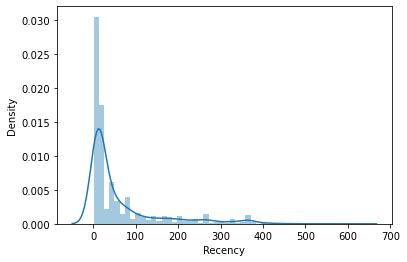

In [116]:
x = RFMScores['Recency']
ax = sns.distplot(x)


In [117]:
RFMScores.Monetary.describe()

count    4.349000e+03
mean     2.299380e+05
std      8.572589e+05
min     -5.037200e+04
25%      3.814800e+04
50%      8.365500e+04
75%      2.056120e+05
max      3.553619e+07
Name: Monetary, dtype: float64

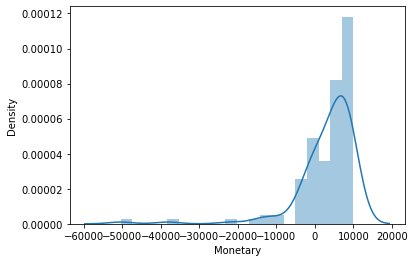

In [118]:
x = RFMScores.query('Monetary < 10000')['Monetary']
ax = sns.distplot(x)

In [119]:
# Split the data into 4 segments based on quatile

quantils = RFMScores.quantile(q=[0.25, 0.5, 0.75])
quantils = quantils.to_dict()
quantils

{'Recency': {0.25: 10.0, 0.5: 19.0, 0.75: 73.0},
 'Frequency': {0.25: 9.0, 0.5: 16.0, 0.75: 33.0},
 'Monetary': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [120]:
# Recency - 0.25 (better customer)
# ferquncy- 0.75
# monetary - 0.75

In [121]:
# Functions to create R, F, M Segments
# 3 parameters- x=my variable, d=dictionary, p = percentile(quantile value)
# RScores = Recency Score
# FScores = Frequency Score
# MScores = Monetary Score

def RScores(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FScores(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# def MScores(x,p,d):
#     if x <= d[p][0.25]:
#         return 1
#     elif x<= d[p][0.50]:
#          return 2
#     elif x<= d[p][0.75]:
#         return 3
#     else:
#         return 4
    


In [122]:
RFMScores.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

## The Filtered Data - Approach 1

In [123]:
RFMScores['R'] = RFMScores['Recency'].apply(RScores, args=('Recency',quantils))
RFMScores['F'] = RFMScores['Frequency'].apply(FScores, args=('Frequency',quantils))
RFMScores['M'] = RFMScores['Monetary'].apply(FScores, args=('Monetary',quantils))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,4,63,553704.0,1,1,1
3.0,77,18,257404.0,4,2,1
4.0,20,10,176613.0,3,3,2
5.0,18,7,41976.0,2,4,3
6.0,9,42,151822.0,1,1,2


## The Filtered Data - Approach 2

In [124]:
RFMScores['RFMGroup'] = RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)
RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis=1)

# Problem is there will be values in between which can be problematic to get the priority for R, F, M values
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3
3.0,77,18,257404.0,4,2,1,421,7
4.0,20,10,176613.0,3,3,2,332,8
5.0,18,7,41976.0,2,4,3,243,9
6.0,9,42,151822.0,1,1,2,112,4


Decide which one is best , select no. of clusters   
K-Means Cluster(Algo method)

**Here, we are going with 4 Clusters**

(qcut to cut off using pandas)

In [125]:
Loyalty_level = ['Platinum','Gold','Silver','Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q=4, labels = Loyalty_level)
RFMScores['RFM_Loyalty_level'] = Score_cuts.values
RFMScores.reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,2.0,4,63,553704.0,1,1,1,111,3,Platinum
1,3.0,77,18,257404.0,4,2,1,421,7,Gold
2,4.0,20,10,176613.0,3,3,2,332,8,Gold
3,5.0,18,7,41976.0,2,4,3,243,9,Silver
4,6.0,9,42,151822.0,1,1,2,112,4,Platinum
5,7.0,208,4,9410.0,4,4,4,444,12,Bronze
6,8.0,234,10,135550.0,4,3,2,432,9,Silver
7,9.0,15,7,65832.0,2,4,3,243,9,Silver
8,10.0,16,22,331601.0,2,2,1,221,5,Platinum
9,11.0,9,10,771439.0,1,3,1,131,5,Platinum


**So for visualization purpose we are showing the stage of data here in the next table**

In [126]:
# Filter RFMGroup = 111

RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level
0,1704.0,3,235,35536194.0,1,1,1,111,3,Platinum
1,1896.0,2,356,17743855.0,1,1,1,111,3,Platinum
2,56.0,10,108,14357682.0,1,1,1,111,3,Platinum
3,1346.0,9,237,12647317.0,1,1,1,111,3,Platinum
4,3802.0,3,236,12319439.0,1,1,1,111,3,Platinum
5,4234.0,3,94,10654918.0,1,1,1,111,3,Platinum
6,1006.0,5,211,9351019.0,1,1,1,111,3,Platinum
7,3203.0,5,99,8102167.0,1,1,1,111,3,Platinum
8,2193.0,1,357,7966054.0,1,1,1,111,3,Platinum
9,1448.0,5,190,7892625.0,1,1,1,111,3,Platinum


In [128]:
# # Trial to handle negative and zero values 
"""
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
    
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]
"""

# # But this is not a good approach as the values in monetary 

### Model Building -  K- mean Cluster build up

In [85]:
RFMScores = RFMScores.reset_index()

In [86]:
RFMScores1 = RFMScores.iloc[:,0:4]

In [87]:
RFMScores1.head()

,CustomerID,Recency,Frequency,Monetary
0,2.0,4,63,553704.0
1,3.0,77,18,257404.0
2,4.0,20,10,176613.0
3,5.0,18,7,41976.0
4,6.0,9,42,151822.0


**In k Mean cluster only Euclidean distance (d =√[(x2 – x1)2 + (y2 – y1)2] ) is used not other type of distance**

In [ ]:
# from sklearn.preprocessing import StandardScaler 
# apply feature scaling as well for simplicity of calculation

## K - Means cluster

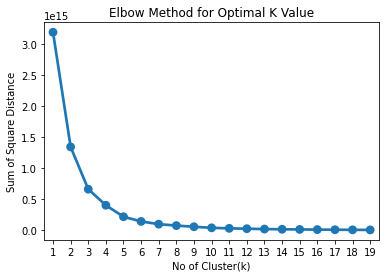

In [131]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
    
for  k in range(1,20):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=500)
    km  =km.fit(RFMScores1)
    sum_of_sq_dist[k] = km.inertia_
    
sns.pointplot(x = list(sum_of_sq_dist.keys()), y =list(sum_of_sq_dist.values()))
plt.xlabel("No of Cluster(k)")
plt.ylabel("Sum of Square Distance")
plt.title("Elbow Method for Optimal K Value")
plt.show()

In [132]:
# Your choice k = 5 or 6 or less or more
kmeans_cluster = KMeans(n_clusters=6, init='k-means++', max_iter=500)
kmeans_cluster.fit(RFMScores1)

KMeans(max_iter=500, n_clusters=6)

In [133]:
RFMScores['Cluster'] = kmeans_cluster.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_level,Cluster
CustomerID,,,,,,,,,,
2.0,4,63,553704.0,1,1,1,111,3,Platinum,0
3.0,77,18,257404.0,4,2,1,421,7,Gold,3
4.0,20,10,176613.0,3,3,2,332,8,Gold,3
5.0,18,7,41976.0,2,4,3,243,9,Silver,3
6.0,9,42,151822.0,1,1,2,112,4,Platinum,3
7.0,208,4,9410.0,4,4,4,444,12,Bronze,3
8.0,234,10,135550.0,4,3,2,432,9,Silver,3
9.0,15,7,65832.0,2,4,3,243,9,Silver,3
10.0,16,22,331601.0,2,2,1,221,5,Platinum,0


In [134]:
os.getcwd()

'H:\\AppsForPc\\LearnPython_Jupyter\\Projects_marathon2\\Project 2 - Ecommerce Analysis'

In [135]:
RFMScores.to_csv('New_cluster_data.csv')

In [136]:
dataset.head()

,CustomerID,Item Code,InvoiceNo,Date,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set,Date1
0,4355.0,15734,398177.0,2017-10-29,6.0,3:36:00 PM,321.0,1926.0,Location 1,NaN,NaN,NaN,2017-10-29
1,4352.0,14616,394422.0,2017-05-10,2.0,2:53:00 PM,870.0,1740.0,Location 1,NaN,NaN,NaN,2017-05-10
2,4352.0,14614,394422.0,2017-12-10,2.0,2:53:00 PM,933.0,1866.0,Location 1,NaN,NaN,NaN,2017-12-10
3,4352.0,85014B,388633.0,2017-08-22,3.0,2:47:00 PM,623.0,1869.0,Location 1,NaN,NaN,NaN,2017-08-22
4,4352.0,15364,394422.0,2017-10-10,2.0,2:53:00 PM,944.0,1888.0,Location 1,NaN,NaN,NaN,2017-10-10
